<a href="https://colab.research.google.com/github/Nemat-Allah-Aloush/Machine_Learning_Techinques/blob/main/Task_5_CNN_and_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nemat_Allah_Aloush_J41332c_MLT_2022_Task_5

* Name: Nemat Allah Aloush
* ISU group: J41332c
* ISU number: 336092

## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [ ]:
import os
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras. applications. vgg16 import VGG16
from keras.applications.xception import Xception
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [ ]:
# if you are using google colab for this task you can mount your GoogleDrive as follows: 
from google.colab import drive
drive.mount('/content/drive/')

# After running this cell you should enter the authorization code from your Google account

Mounted at /content/drive/


In [ ]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = '/content/drive/My Drive/Cats_and_Dogs/train'
val =   '/content/drive/My Drive/Cats_and_Dogs/val'
test =  '/content/drive/My Drive/Cats_and_Dogs/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size 
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [ ]:
model_1 = Sequential()
# 1: +Convolutional
# For example:
model_1.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model_1.add(Activation('relu'))
# 2: +Pooling
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=None))
# 3: Convolutional
model_1.add(Conv2D(32, (3, 3)))
#     +Relu
model_1.add(Activation('relu'))
# 4:  +Pooling 
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=None))
# 5:  +Convolutional
model_1.add(Conv2D(64, (3, 3), input_shape=input_shape))
#     +Relu
model_1.add(Activation('relu'))
# 6:  +Pooling 
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=None))
# 7:  +Flattening
model_1.add(Flatten())
# 8:  +Dense
model_1.add(Dense(64))
# 9:  +Dropout
model_1.add(Dropout(0.5))
# 10: +Dense +activations.sigmoid(x)
model_1.add(Dense(1, activation='sigmoid'))


In [ ]:
model_1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### Training for 10 epochs

In [ ]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH
history_10_epochs=model_1.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
312/312 [==============================] - 97s 309ms/step - loss: 0.5890 - accuracy: 0.6754 - val_loss: 0.5004 - val_accuracy: 0.7636
Epoch 2/10
312/312 [==============================] - 93s 297ms/step - loss: 0.4721 - accuracy: 0.7795 - val_loss: 0.4321 - val_accuracy: 0.8035
Epoch 3/10
312/312 [==============================] - 91s 293ms/step - loss: 0.4176 - accuracy: 0.8120 - val_loss: 0.4124 - val_accuracy: 0.8129
Epoch 4/10
312/312 [==============================] - 96s 307ms/step - loss: 0.3608 - accuracy: 0.8445 - val_loss: 0.3954 - val_accuracy: 0.8224
Epoch 5/10
312/312 [==============================] - 93s 297ms/step - loss: 0.3132 - accuracy: 0.8650 - val_loss: 0.4061 - val_accuracy: 0.8195
Epoch 6/10
312/312 [==============================] - 93s 298ms/step - loss: 0.2660 - accuracy: 0.8894 - val_loss: 0.3978 - val_accuracy: 0.8339
Epoch 7/10
312/312 [==============================] - 91s 291ms/step - loss: 0.2151 - accuracy: 0.9128 - val_loss: 0.4404 - val_ac

In [ ]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong
scores = model_1.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Accuracy on test data: 79.93%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

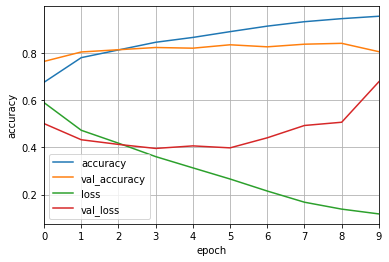

In [ ]:
# summarize history for loss
plt.plot(history_10_epochs.history['accuracy'])
plt.plot(history_10_epochs.history['val_accuracy'])
plt.plot(history_10_epochs.history['loss'])
plt.plot(history_10_epochs.history['val_loss'])
plt.xlim(0,9)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

#### Training for 15 epochs

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1),
    ModelCheckpoint('first_model.h5', verbose=1, save_best_only=True)
]

In [ ]:
 history_15_epochs = model_1.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15, #  try differe nt number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,  
    validation_steps=nb_validation_samples // batch_size)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
312/312 [==============================] - 10631s 34s/step - loss: 0.6047 - accuracy: 0.6667 - val_loss: 0.5597 - val_accuracy: 0.7072
Epoch 2/15
312/312 [==============================] - 115s 368ms/step - loss: 0.4845 - accuracy: 0.7700 - val_loss: 0.5008 - val_accuracy: 0.7743
Epoch 3/15
312/312 [==============================] - 116s 373ms/step - loss: 0.4213 - accuracy: 0.8081 - val_loss: 0.4408 - val_accuracy: 0.7977
Epoch 4/15
312/312 [==============================] - 113s 363ms/step - loss: 0.3763 - accuracy: 0.8335 - val_loss: 0.4303 - val_accuracy: 0.8084
Epoch 5/15
312/312 [==============================] - 117s 375ms/step - loss: 0.3293 - accuracy: 0.8586 - val_loss: 0.3885 - val_accuracy: 0.8306
Epoch 6/15
312/312 [==============================] - 113s 361ms/step - loss: 0.2927 - accuracy: 0.8733 - val_loss: 0.4004 - val_accuracy: 0.8363
Epoch 7/15
312/312 [==============================] - 114s 366ms/step - loss: 0.2520 - accuracy: 0.8957 - val_loss: 0.4670 -

In [ ]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong
scores = model_1.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Accuracy on test data: 82.93%


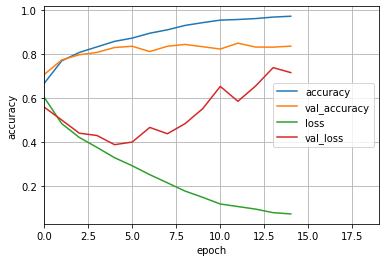

In [ ]:
# summarize history for loss
plt.plot(history_15_epochs.history['accuracy'])
plt.plot(history_15_epochs.history['val_accuracy'])
plt.plot(history_15_epochs.history['loss'])
plt.plot(history_15_epochs.history['val_loss'])
plt.xlim(0,19)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

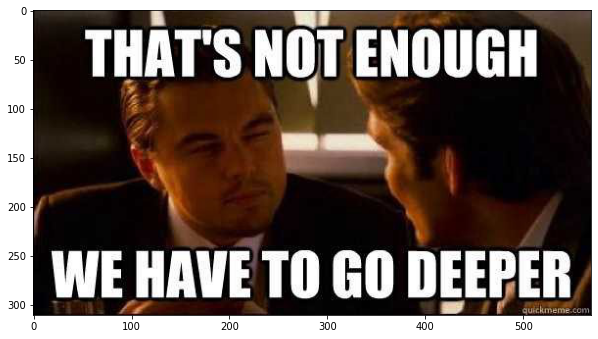

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('/content/drive/My Drive/Deeper.jpeg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()


Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

##### VGG16

In [ ]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [ ]:
# add layers to VGG16:

model_2 = Sequential()
model_2.add(vgg16_net)

# + flattening
model_2.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
# + ReLu
model_2.add(Dense(256, activation='relu'))
# + Dropout
model_2.add(Dropout(0.5))
# + Dense layer with 1 neuron
# + sigmoid
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model_2.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


E.g., it was like:


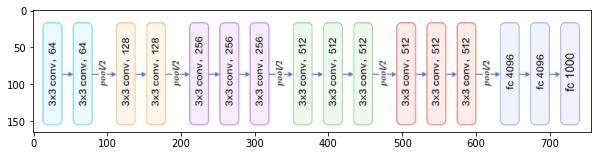

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

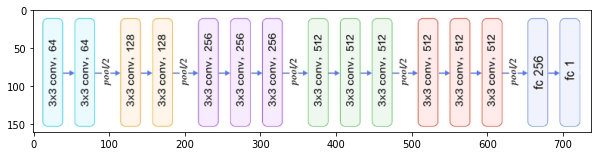

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [ ]:
# add some callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1),
    ModelCheckpoint('vgg16.h5', verbose=1, save_best_only=True)
]

In [ ]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history_vgg=model_2.fit_generator( 
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/5
312/312 [==============================] - 132s 419ms/step - loss: 0.4897 - accuracy: 0.7568 - val_loss: 0.3487 - val_accuracy: 0.8660
Epoch 2/5
312/312 [==============================] - 129s 411ms/step - loss: 0.3389 - accuracy: 0.8539 - val_loss: 0.2941 - val_accuracy: 0.8865
Epoch 3/5
312/312 [==============================] - 129s 412ms/step - loss: 0.2970 - accuracy: 0.8749 - val_loss: 0.2721 - val_accuracy: 0.8935
Epoch 4/5
312/312 [==============================] - 129s 412ms/step - loss: 0.2742 - accuracy: 0.8860 - val_loss: 0.2576 - val_accuracy: 0.8984
Epoch 5/5
312/312 [==============================] - 128s 410ms/step - loss: 0.2565 - accuracy: 0.8950 - val_loss: 0.2500 - val_accuracy: 0.9005


In [ ]:
scores = model_2.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy on test data: 89.10%


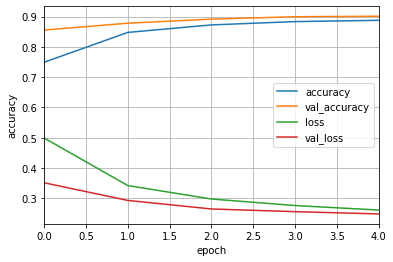

In [ ]:
# summarize history for loss
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.xlim(0,4)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

##### Xception model

In [ ]:
# download pretrained model
xception = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3))
xception.trainable = False
xception.summary()

83697664/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                          

In [ ]:
# add layers :
model = Sequential()
model.add(xception)
# + flattening
model.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
# + ReLu
model.add(Dense(256, activation='relu'))
# + Dropout
model.add(Dropout(0.5))
# + Dense layer with 1 neuron
# + sigmoid
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               13107456  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 33,969,193
Trainable params: 13,107,713
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1),
    ModelCheckpoint('xception.h5', verbose=1, save_best_only=True)
]

In [ ]:
history_xception=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
312/312 [==============================] - 136s 419ms/step - loss: 0.1111 - accuracy: 0.9548 - val_loss: 0.0864 - val_accuracy: 0.9646
Epoch 2/5
312/312 [==============================] - 128s 409ms/step - loss: 0.0727 - accuracy: 0.9713 - val_loss: 0.0855 - val_accuracy: 0.9650
Epoch 3/5
312/312 [==============================] - 126s 405ms/step - loss: 0.0583 - accuracy: 0.9773 - val_loss: 0.0873 - val_accuracy: 0.9642
Epoch 4/5
312/312 [==============================] - 127s 406ms/step - loss: 0.0486 - accuracy: 0.9816 - val_loss: 0.0840 - val_accuracy: 0.9655
Epoch 5/5
312/312 [==============================] - 128s 409ms/step - loss: 0.0403 - accuracy: 0.9858 - val_loss: 0.0852 - val_accuracy: 0.9626


In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy on test data: 96.11%


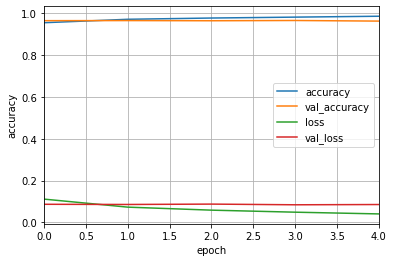

In [ ]:
# summarize history for loss
plt.plot(history_xception.history['accuracy'])
plt.plot(history_xception.history['val_accuracy'])
plt.plot(history_xception.history['loss'])
plt.plot(history_xception.history['val_loss'])
plt.xlim(0,4)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

##### inference of the algorithms

In [ ]:
# load cat and dog images
cat = image.load_img('/content/drive/My Drive/Kitten.jpg', target_size=(150, 150))
dog = image.load_img('/content/drive/My Drive/Doggy.jpg', target_size=(150, 150))

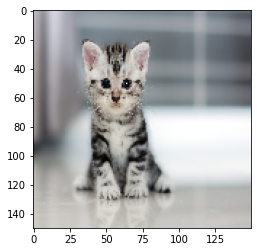

In [ ]:
plt.imshow(cat)

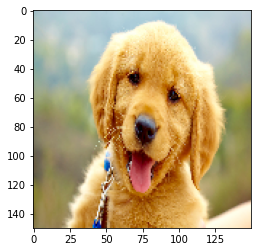

In [ ]:
plt.imshow(dog)

In [ ]:
# transform images to array
x_cat = image.img_to_array(cat)
x_dog = image.img_to_array(dog)

x_cat = np.expand_dims(x_cat, axis=0)
x_dog = np.expand_dims(x_dog, axis=0)
cat_feature = np.vstack([x_cat])
dog_feature = np.vstack([x_dog])

In [ ]:
cat_pred = model_1.predict(cat_feature, batch_size=1)
cat_label = 'cat' if cat_pred < 0.5 else 'dog'
print(f'first model predicted cat as: {cat_label}')

dog_pred = model_1.predict(dog_feature, batch_size=1)
dog_label = 'cat' if dog_pred < 0.5 else 'dog'
print(f'first model predicted dog as: {dog_label}')

first model predicted cat as: cat
first model predicted dog as: dog


In [ ]:
cat_pred = model_2.predict(cat_feature, batch_size=1)
cat_label = 'cat' if cat_pred < 0.5 else 'dog'
print(f'vgg16 predicted cat as: {cat_label}')

dog_pred = model_2.predict(dog_feature, batch_size=1)
dog_label = 'cat' if dog_pred < 0.5 else 'dog'
print(f'vgg16 predicted dog as: {dog_label}')

vgg16 predicted cat as: cat
vgg16 predicted dog as: dog


In [ ]:
name='xception'
cat_pred = model.predict(cat_feature, batch_size=1)
cat_label = 'cat' if cat_pred < 0.5 else 'dog'
print(f'xception predicted cat as: {cat_label}')

dog_pred = model.predict(dog_feature, batch_size=1)
dog_label = 'cat' if dog_pred < 0.5 else 'dog'
print(f'xception predicted dog as: {dog_label}')

xception predicted cat as: dog
xception predicted dog as: dog
